In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

%matplotlib notebook

### FRED Data Identifiers

1) 6-Mo Const. Maturity Rate: DGS6MO<br/>
2) 1-Year Const. Maturity Rate: DGS1 <br/>
3) 2-Year Const. Maturity Rate: DGS2<br/>
4) 3-Year Const. Maturity Rate: DGS3<br/>
5) 5-Year Const. Maturity Rate: DGS5<br/>
6) 7-Year Const. Maturity Rate: DGS7<br/>
7) 10-Year Const. Maturity Rate: DGS10<br/>
8) 20-Year Const. Maturity Rate: DGS20<br/>
9) 30-Year Const. Matuirty Rate: DGS30<br/>
10) Consumer Price Index for All Urban Consumers: All Items: CPIAUCSL<br/>
11) Consumer Price Index for All Urban Consumers: All Items Less Food and Energy: CPILFESL<br/>
12) Personal Consumption Expenditures: Chain-type Price Index: PCEPI<br/>
13) Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index): PCEPILFE

In [2]:
# First, store FRED IDs in a dictionary key = maturity (in years), value = yield
ids_const_maturity_rate = {.5: 'DGS6MO'}
col_names = ['6-MO']
maturities=[0.5,1,3,5,7,10,20,30]
for i in maturities[1:]:
    ids_const_maturity_rate[i] = 'DGS' + str(i) 
    col_names.append('%i-YR'%i)
    

In [3]:
# Download Data from FRED API including all NANs
start_date = '2000-01-01'
end_date = pd.datetime.today()

yields = data.DataReader(ids_const_maturity_rate.values(), 'fred', start_date, end_date)
yields.columns = col_names
yields.head()

,6-MO,1-YR,3-YR,5-YR,7-YR,10-YR,20-YR,30-YR
DATE,,,,,,,,
2000-01-03,5.81,6.09,6.42,6.50,6.65,6.58,6.94,6.61
2000-01-04,5.75,6.00,6.34,6.40,6.56,6.49,6.84,6.53
2000-01-05,5.74,6.05,6.43,6.51,6.68,6.62,6.95,6.64
2000-01-06,5.69,6.03,6.39,6.46,6.63,6.57,6.86,6.58
2000-01-07,5.66,6.00,6.35,6.42,6.58,6.52,6.82,6.55


In [4]:
from ipywidgets import interact
import ipywidgets as widgets

In [19]:
def plot_yield_curve(date):
    fig, ax = plt.subplots(figsize=(8,4))
    line = ax.plot(maturities, yields.loc[date].values)
    ax.set_title('Yield Curve: %s' % date)
    ax.set_xticks(maturities)
    ax.set_xticklabels(col_names, rotation=90);
    return ax, line[0]
    
def update(date):
    try:
        ys = yields.loc[date]  
        line.set_ydata(ys)
        if isinstance(date, pd.datetime):
            disp_date=date.date()
        else:
            disp_date=date
        ax.set_title('Yield Curve: %s' % disp_date())
        ax.set_ylim([ys.min(), ys.max()])
        
    except KeyError:
        print "Date Not Found:", date
    except TypeError:
        pass
    else:
        print "OK"
    
    
# plot_yield_curve('2017-11-15')  

<IPython.core.display.Javascript object>


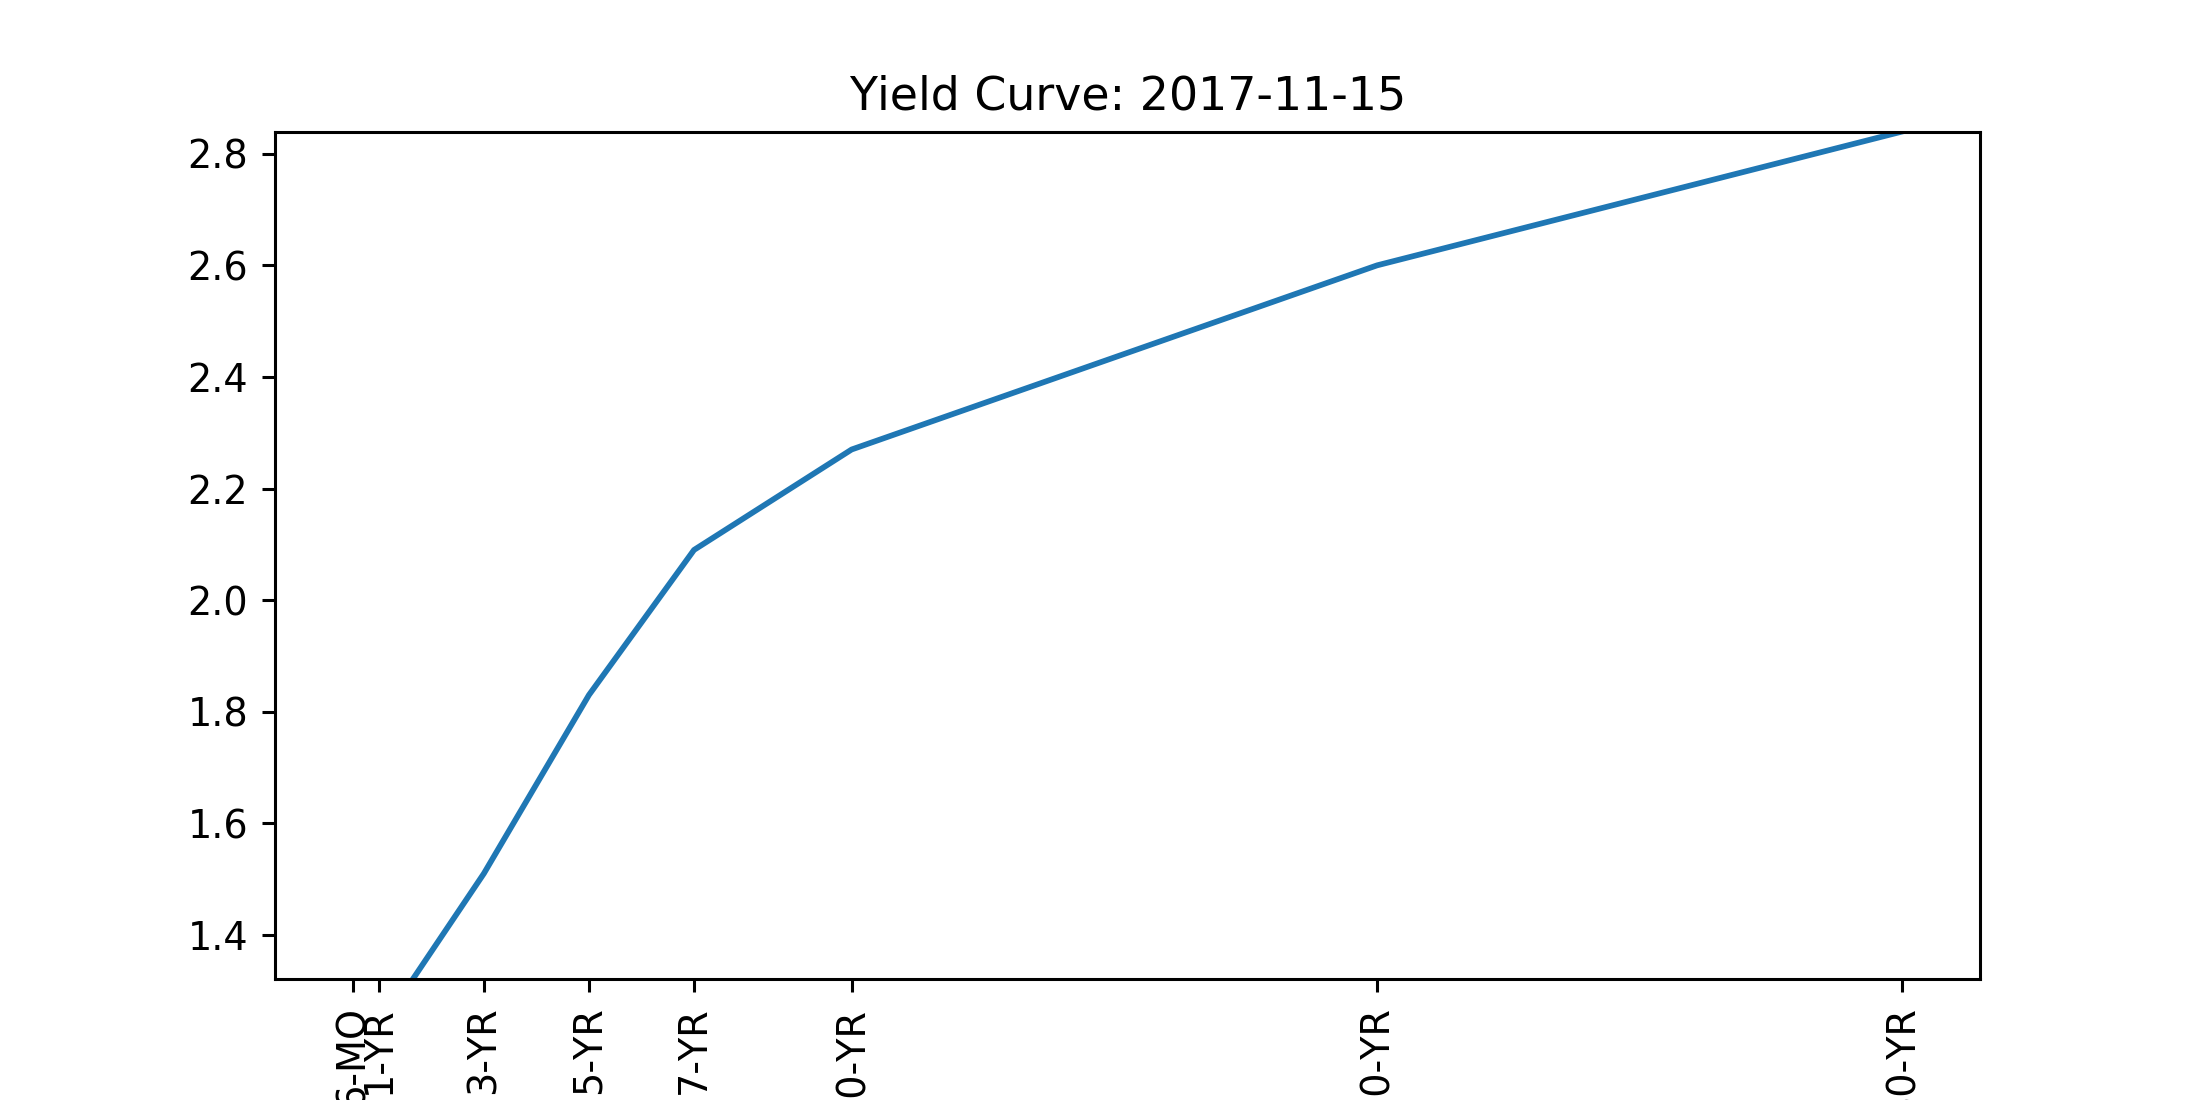

A Jupyter Widget

In [20]:
date_picker = widgets.DatePicker(value=pd.datetime(2017,11,15), description='Pick a Date ', disabled=False )
ax, line = plot_yield_curve('2017-11-15')
interact(update, date=date_picker);